1. Создайте QR-код для какого-либо сайта, сохраните его в виде
изображения. Убедитесь, что Ваш смартфон его распознает, и что из этого
изображения Вы можете извлечь оригинальную ссылку.

In [1]:
import qrcode

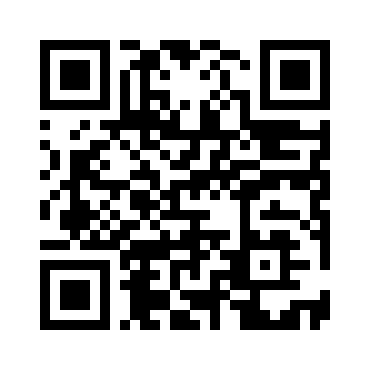

In [2]:
qr = qrcode.QRCode(version=1, box_size=10, border=4)
qr.add_data("https://github.com/ALexfonSchneider")
qr.make()
img = qr.make_image(fill_color="black", back_color="white")
img.save("resources/git_qr.jpg")
img

2. Извлеките ссылку из изображения «qr.jpg».

In [3]:
import cv2
import matplotlib.pyplot as plt

QRCode data:
http://www.bio.asu.ru/


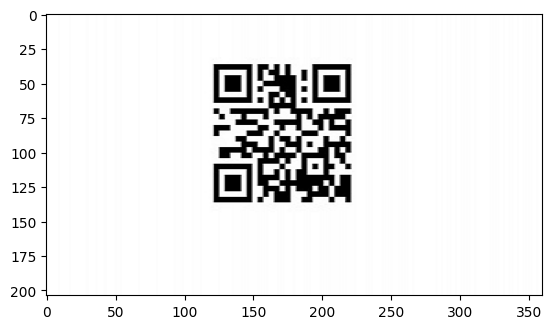

In [4]:
img = cv2.imread("resources/qr.jpg")
plt.imshow(img)
detector = cv2.QRCodeDetector()
data, bbox, straight_qrcode = detector.detectAndDecode(img)
if bbox is not None:
    print(f"QRCode data:\n{data}")

3. Распознайте с помощью pytesseract текст на немецком языке из
изображения «de_text1.png». Пометьте с помощью рамок зеленого цвета
слова «ich» в исходном изображении.

In [5]:
import pytesseract
import os

os.environ["TESSDATA_PREFIX"] = r"C:\Program Files\Tesseract-OCR\tessdata"
print(os.environ["TESSDATA_PREFIX"])
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

C:\Program Files\Tesseract-OCR\tessdata


In [6]:
def hl_words_on_image(img:str | cv2.typing.MatLike, target_word:str, language:str = "eng"):
    if type(img) == str: image = cv2.imread(img)
    else: image = img
    image_copy = image.copy()
    data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT, lang=language) # получить все данные из изображения
    print(data)
    print(data["text"])
    print([ word for _, word in enumerate(data["text"]) if not any(char in ".,:;!?_*-+=()/#¤%&)|[]()" for char in word) and len(word)>0 ])
    word_occurences = [ i for i, word in enumerate(data["text"]) if word.lower() == target_word.lower() ] # получить все вхождения нужного слова
    print(word_occurences)
    for occ in word_occurences:
        # извлекаем ширину, высоту, верхнюю и левую позицию для обнаруженного слова
        w = data["width"][occ]
        h = data["height"][occ]
        l = data["left"][occ]
        t = data["top"][occ]
        # определяем все точки окружающей рамки
        p1 = (l, t)
        p2 = (l + w, t)
        p3 = (l + w, t + h)
        p4 = (l, t + h)
        # рисуем 4 линии (прямоугольник)
        image_copy = cv2.line(image_copy, p1, p2, color=(0, 255, 0), thickness=2)
        image_copy = cv2.line(image_copy, p2, p3, color=(0, 255, 0), thickness=2)
        image_copy = cv2.line(image_copy, p3, p4, color=(0, 255, 0), thickness=2)
        image_copy = cv2.line(image_copy, p4, p1, color=(0, 255, 0), thickness=2)
        
    return image_copy

{'level': [1, 2, 3, 4, 5, 5, 5, 5, 4, 5, 5, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 3, 4, 5, 5, 5, 2, 3, 4, 5, 5, 5, 4, 5, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 

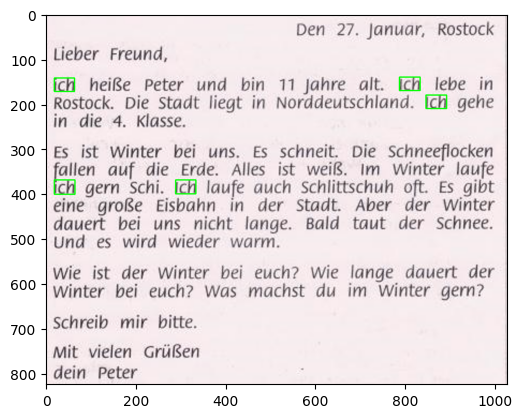

In [7]:
image_copy = hl_words_on_image("resources/de_text1.png", "ich")

plt.imsave("resources/all_ich_words.png", image_copy)
plt.imshow(image_copy)
plt.show()

plt.imsave("resources/all_ich_words.png", image_copy)

4. Попробуйте придумать и реализовать преобразования (геометрические,
цветовые, морфологические или любые другие) изображений
«rus_text1.jpg», «rus_text2.jpg», «rus_text3.jpg» и «rus_text4.jpg», чтобы
текст на них всё же можно было распознать с помощью pytesseract.

In [8]:
import numpy as np

In [9]:
def third_type(x, left_limit=90, right_limit=117, height=255, selt_color=False) -> int:
    if selt_color: height_in_limit = int(x)
    else: height_in_limit = int(max(min(height, 255), 0))
    if left_limit <= int(x) <= right_limit: return height_in_limit
    else: return 0
    
# функция преобразование изображения
def object_selection(img, left_limit=90, right_limit=117, height=100, self_color=False, method="rgb"):
    result = img.copy()
    
    for row_i in range(len(result)):
        for pix_i in range(len(result[row_i])):
            match method:
                case "rgb":
                    result[row_i][pix_i] = [
                        third_type(img[row_i][pix_i][0], left_limit, right_limit, height, self_color),
                        third_type(img[row_i][pix_i][1], left_limit, right_limit, height, self_color),
                        third_type(img[row_i][pix_i][2], left_limit, right_limit, height, self_color)
                    ]
                case "avg":
                    avg = (img[row_i][pix_i][0] + img[row_i][pix_i][1] + img[row_i][pix_i][2])/3
                    result[row_i][pix_i] = [
                        third_type(avg, left_limit, right_limit, height, self_color),
                        third_type(avg, left_limit, right_limit, height, self_color),
                        third_type(avg, left_limit, right_limit, height, self_color)
                    ]
            
    return(result)

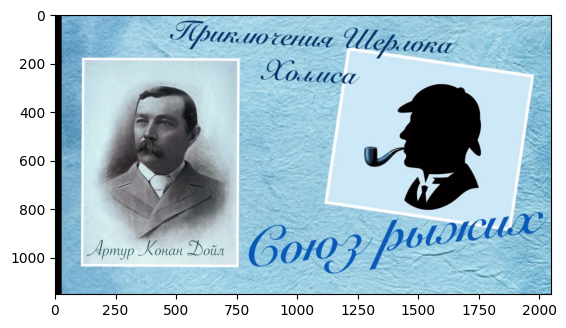

In [10]:
image_copy = cv2.imread("resources/rus_text1.jpg")
plt.imshow(image_copy)

Изображение имеет схожие цвета текста и фона, поэтому бинаризовпть изображение по силе каналов не получится.  
Однако в изображении число пикселей фона явно преобладает над пикселями текста, выделим эти пиксели при помощи гостограммы:

(array([282729.,  34652., 108130.,  16049.,   9762.,   6377.,   7599.,
          6004.,   5504.,   8506.,   4022.,   8572.,   2561.,   5774.,
          2229.,   3664.,   1833.,   2491.,   2248.,   2196.,   2060.,
          1936.,   2283.,   1762.,   2184.,   1980.,   2221.,   1952.,
          1987.,   2280.,   2133.,   2381.,   2162.,   2509.,   2229.,
          2161.,   2690.,   2329.,   2877.,   2866.,   3223.,   2975.,
          3057.,   3656.,   3221.,   4542.,   4330.,   5155.,   4974.,
          5779.,   7203.,   7344.,   9869.,   8489.,   9453.,   8407.,
          8096.,   9196.,   6749.,   8957.,   7193.,   8621.,   7333.,
          7822.,   7377.,   5859.,   7696.,   6096.,   6513.,   5140.,
          5825.,   5838.,   5571.,   5746.,   5184.,   5381.,   4623.,
          5526.,   5729.,   5790.,   5484.,   5170.,   5720.,   4890.,
          5904.,   5576.,   6460.,   6473.,   9700.,  11376.,  11941.,
          9358.,   7782.,   7526.,   6365.,   7266.,   6370.,   6036.,
      

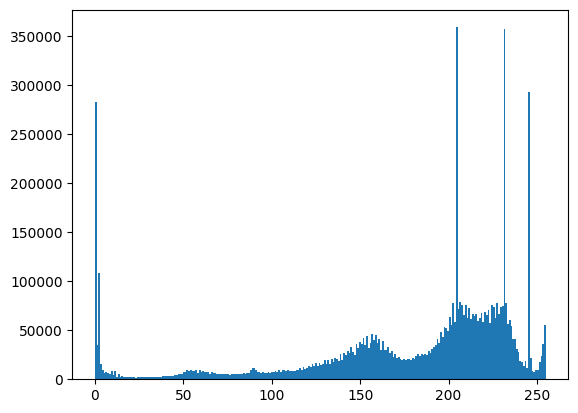

In [11]:
plt.hist(np.ravel(image_copy), 256)

среди интенсивностей каналов выделим те, чсло которых > 7000, это и будут пиксели фона:

[0,
 1,
 2,
 3,
 4,
 6,
 9,
 11,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 59,
 60,
 61,
 62,
 63,
 64,
 66,
 88,
 89,
 90,
 91,
 92,
 93,
 95,
 98,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,


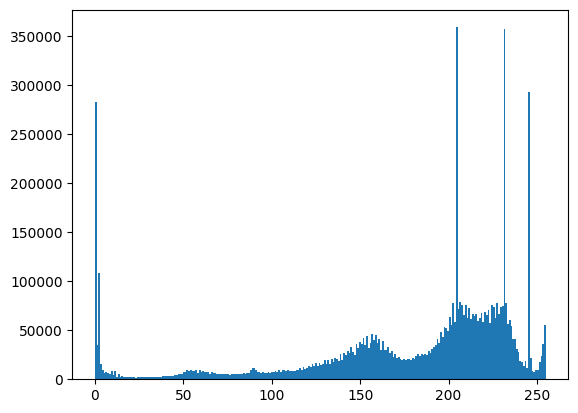

In [12]:
intens_occurences = [ i for i, intens in enumerate(plt.hist(np.ravel(image_copy), 256)[0]) if intens > 7000 ]
intens_occurences

Отобразим изображение без выделенных каналов:

In [13]:
def not_include_list(x, list, height=255, selt_color=False) -> int:
    if selt_color: height_in_limit = int(x)
    else: height_in_limit = int(max(min(height, 255), 0))
    if int(x) not in list: return height_in_limit
    else: return 0
    
# функция преобразование изображения
def cut_background(img, list, height=255, self_color=False):
    result = img.copy()
    
    for row_i in range(len(result)):
        for pix_i in range(len(result[row_i])):
            result[row_i][pix_i] = [
                not_include_list(img[row_i][pix_i][0], list, height, self_color),
                not_include_list(img[row_i][pix_i][1], list, height, self_color),
                not_include_list(img[row_i][pix_i][2], list, height, self_color)
            ]
            
    return(result)

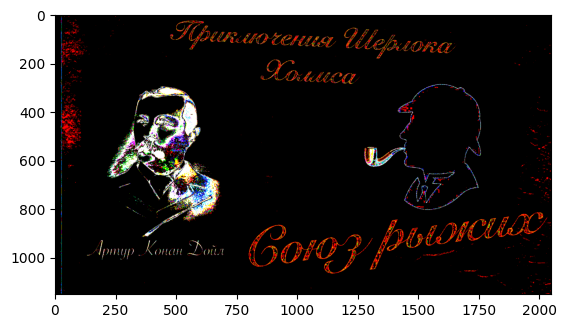

In [14]:
image_without_background = cut_background(image_copy, intens_occurences)
plt.imshow(image_without_background)

фон стал черным, выделим текст белым

C:\Users\Igor\AppData\Local\Temp\ipykernel_39708\2115374295.py:21: RuntimeWarning: overflow encountered in ubyte_scalars
  avg = (img[row_i][pix_i][0] + img[row_i][pix_i][1] + img[row_i][pix_i][2])/3


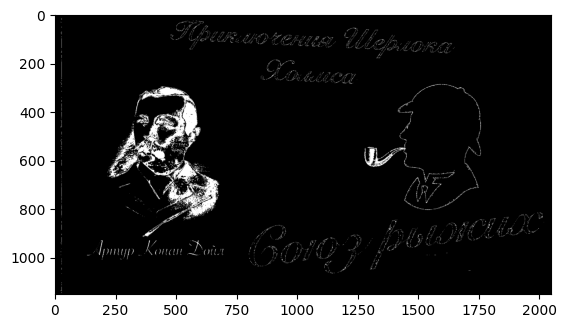

In [15]:
image_copy_text = object_selection(image_without_background, 84, 84, 255, method="avg")
plt.imshow(image_copy_text)

текст более четким

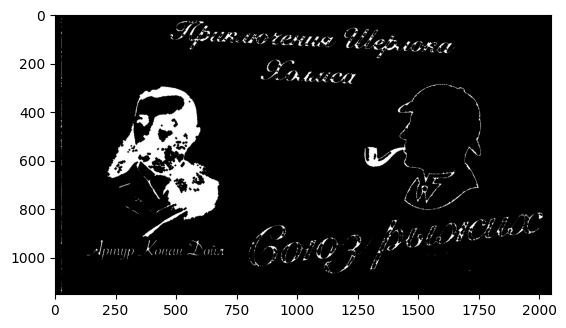

In [16]:
kernel_cross_3 = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
im = cv2.morphologyEx(image_copy_text, cv2.MORPH_CLOSE, kernel_cross_3, iterations=4)
plt.imshow(im)

Инвертируем цвета

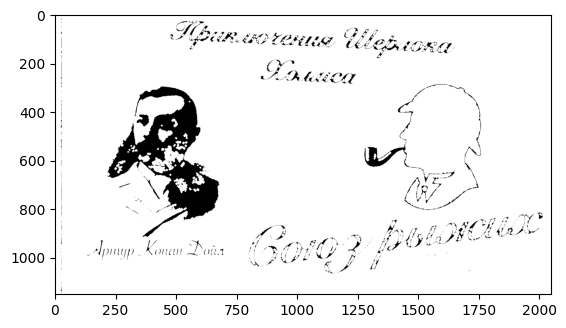

In [17]:
im_ivert = cv2.bitwise_not(im)
plt.imshow(im_ivert)

Распознаем текст

{'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 5, 5, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 4, 5, 5, 2, 3, 4, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7], 'par_num': [0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 2, 0, 0, 1, 1], 'word_num': [0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 3, 4, 5, 0, 0, 0, 1, 0, 0, 0, 1, 2, 3, 4, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1], 'left': [0, 27, 27, 27, 27, 552, 552, 552, 552, 764, 926, 1192, 1423, 210, 210, 210, 210, 157, 157, 157, 157, 344, 368, 546, 1257, 1257, 1257, 1257, 848, 848, 873, 873, 848, 848, 906, 1254, 1254, 1254, 1254], 'top': 

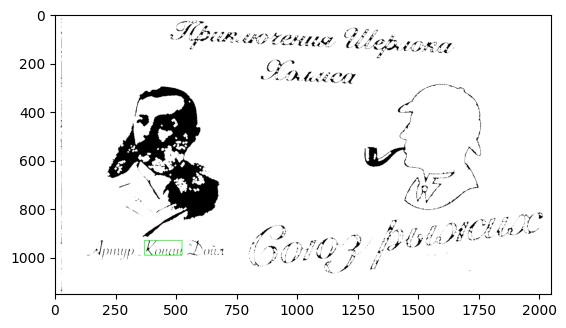

In [18]:
plt.imshow(hl_words_on_image(im_ivert, 'Конан', "rus"))

загрузим второе изображение

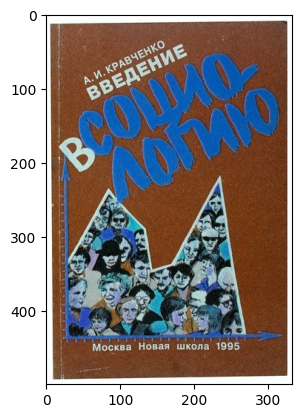

In [19]:
image_copy = cv2.imread("resources/rus_text2.jpg")
plt.imshow(image_copy)

надпись снизу распазнаётся сразу

{'level': [1, 2, 3, 4, 5, 5, 5, 5, 2, 3, 4, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2], 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1], 'word_num': [0, 0, 0, 0, 1, 2, 3, 4, 0, 0, 0, 1], 'left': [0, 63, 63, 63, 63, 126, 177, 230, 0, 0, 0, 0], 'top': [0, 444, 444, 444, 445, 444, 446, 444, 0, 0, 0, 0], 'width': [332, 198, 198, 198, 52, 40, 43, 31, 332, 332, 332, 332], 'height': [500, 11, 11, 11, 10, 10, 8, 10, 500, 500, 500, 500], 'conf': [-1, -1, -1, -1, 92, 90, 90, 96, -1, -1, -1, 95], 'text': ['', '', '', '', 'Москва', 'Новая', 'школа', '1995', '', '', '', '']}
['', '', '', '', 'Москва', 'Новая', 'школа', '1995', '', '', '', '']
['Москва', 'Новая', 'школа', '1995']
[4]


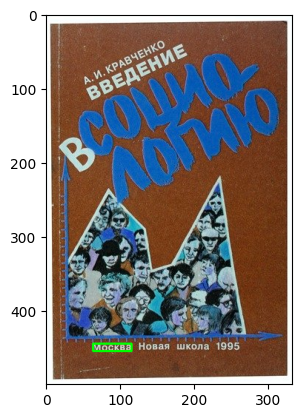

In [20]:
plt.imshow(hl_words_on_image(image_copy, 'москва', "rus"))

проанализируем гистограмму каналов

(array([ 2845.,   620.,   730.,   807.,   962.,  1027.,  1072.,  1233.,
         1404.,  1385.,  1585.,  1681.,  1726.,  1914.,  1979.,  2209.,
         2198.,  2278.,  2478.,  2585.,  2582.,  2691.,  2754.,  2828.,
         2906.,  2956.,  2983.,  2903.,  2960.,  3010.,  2948.,  2970.,
         2994.,  2982.,  2933.,  2814.,  2804.,  2802.,  2806.,  2739.,
         2745.,  2729.,  2681.,  2766.,  2755.,  2860.,  2963.,  3014.,
         3126.,  3342.,  3518.,  3616.,  3579.,  3917.,  4019.,  4254.,
         4254.,  4415.,  4482.,  4586.,  4460.,  4370.,  4371.,  4424.,
         4347.,  4222.,  4104.,  4057.,  3937.,  3792.,  3733.,  3479.,
         3345.,  3173.,  3056.,  2878.,  2881.,  2564.,  2505.,  2319.,
         2226.,  2257.,  2125.,  2118.,  2125.,  2088.,  2196.,  2205.,
         2230.,  2293.,  2358.,  2319.,  2342.,  2274.,  2279.,  2293.,
         2157.,  2314.,  2312.,  2286.,  2285.,  2363.,  2340.,  2454.,
         2614.,  2694.,  2808.,  2922.,  3001.,  3216.,  3198., 

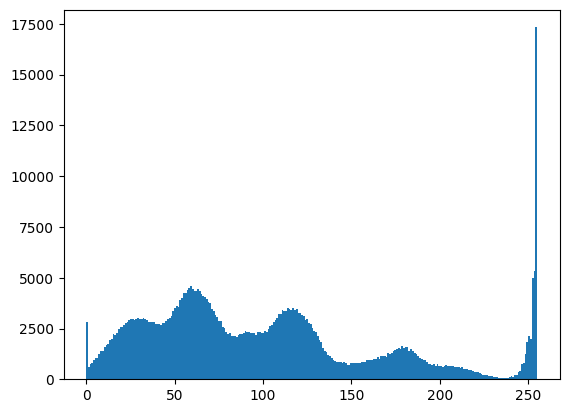

In [21]:
plt.hist(np.ravel(image_copy), 256)

выделим каналы с интенсивностью больше 2500

[0,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186

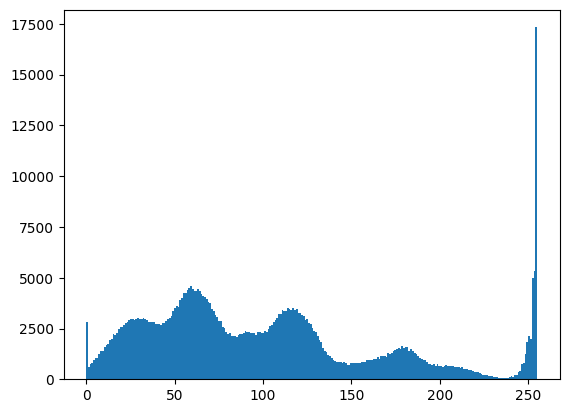

In [22]:
intens_occurences = [ i for i, intens in enumerate(plt.hist(np.ravel(image_copy), 256)[0]) if intens > 700 ]
intens_occurences

вырежем фон:

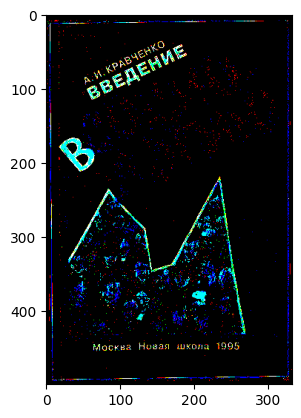

In [23]:
image_without_background = cut_background(image_copy, intens_occurences)
plt.imshow(image_without_background)

бинариуем изображение

C:\Users\Igor\AppData\Local\Temp\ipykernel_39708\2115374295.py:21: RuntimeWarning: overflow encountered in ubyte_scalars
  avg = (img[row_i][pix_i][0] + img[row_i][pix_i][1] + img[row_i][pix_i][2])/3


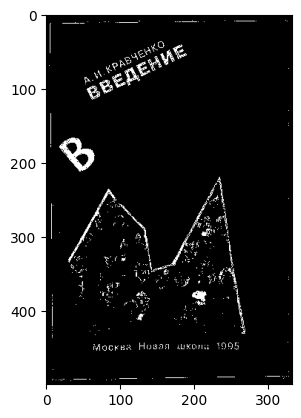

In [24]:
image_copy_text = object_selection(image_without_background, 84, 84, 255, method="avg")
plt.imshow(image_copy_text)

избавимся от шумав и сделаем текст более четким

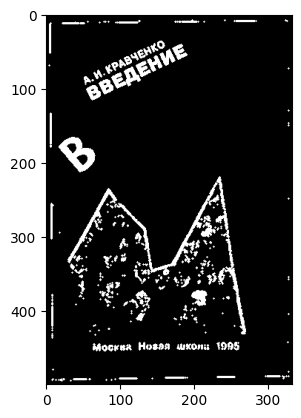

In [25]:
kernel_cross_3 = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
im = cv2.dilate(image_copy_text, kernel_cross_3, iterations=1)
plt.imshow(im)

инвертируем цвета

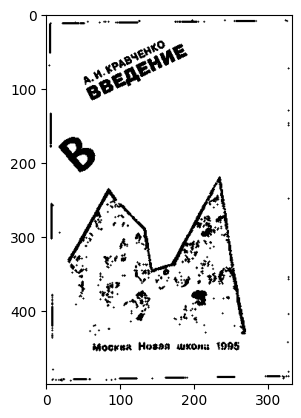

In [26]:
im_ivert = cv2.bitwise_not(im)
plt.imshow(im_ivert)

перевернём изображение

In [27]:
def rotation(img: cv2.typing.MatLike, degree = 45):
    img_copy = img.copy()
    (h, w) = img_copy.shape[:2]
    center = (int(w / 2), int(h / 2))
    rotation_matrix = cv2.getRotationMatrix2D(center, degree, 0.6)
    return cv2.warpAffine(img_copy, rotation_matrix, (w, h))

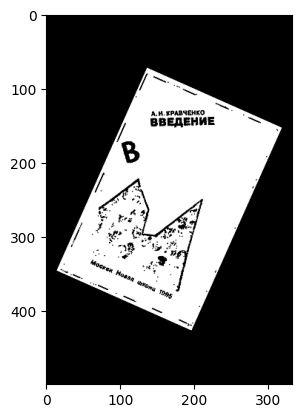

In [28]:
im_rotated=rotation(im_ivert, -24)
plt.imshow(im_rotated)

Распознаем текст

{'level': [1, 2, 3, 4, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3], 'par_num': [0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1], 'word_num': [0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1], 'left': [0, 143, 143, 143, 143, 162, 141, 141, 141, 141, 10, 10, 10, 10], 'top': [0, 130, 130, 130, 131, 130, 139, 139, 139, 139, 68, 68, 68, 68], 'width': [332, 71, 71, 71, 15, 52, 87, 87, 87, 87, 312, 312, 312, 312], 'height': [500, 8, 8, 8, 7, 8, 14, 14, 14, 14, 364, 364, 364, 364], 'conf': [-1, -1, -1, -1, 29, 10, -1, -1, -1, 91, -1, -1, -1, 95], 'text': ['', '', '', '', '.н.', 'кРАВчЕНКО.', '', '', '', 'ВВЕДЕНИЕ', '', '', '', '']}
['', '', '', '', '.н.', 'кРАВчЕНКО.', '', '', '', 'ВВЕДЕНИЕ', '', '', '', '']
['ВВЕДЕНИЕ']
[9]


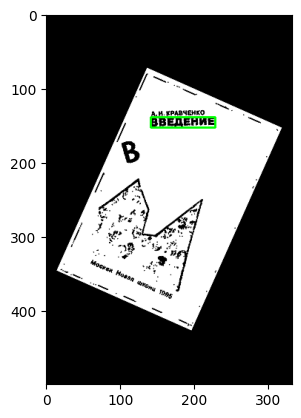

In [29]:
plt.imshow(hl_words_on_image(im_rotated, 'введение', "rus"))

загрузим третье изображение

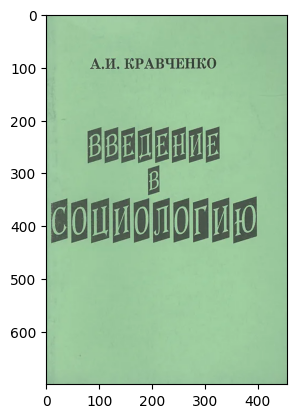

In [30]:
image_copy = cv2.imread("resources/rus_text3.jpg")
plt.imshow(image_copy)

Проанализируем гистограмму и удалим фон

[151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209]

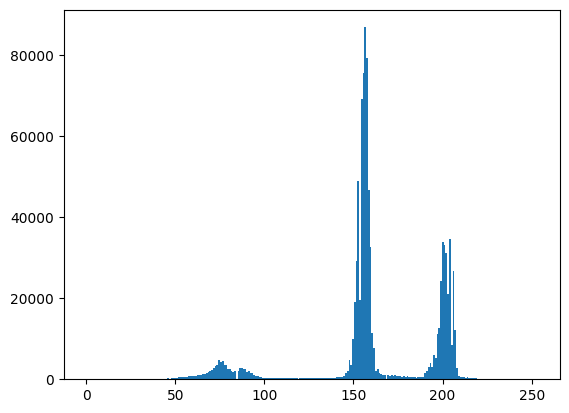

In [31]:
intens_occurences = [ i for i, intens in enumerate(plt.hist(np.ravel(image_copy), 256)[0]) if intens > 5000 ]
intens_occurences

вырежим фон

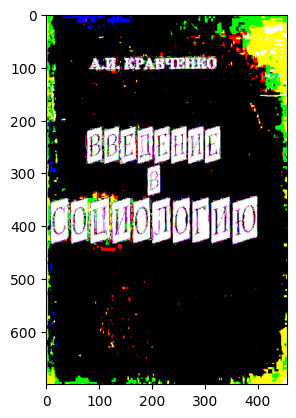

In [32]:
image_without_background = cut_background(image_copy, intens_occurences)
plt.imshow(image_without_background)

бинаризуем изображение

C:\Users\Igor\AppData\Local\Temp\ipykernel_39708\2115374295.py:21: RuntimeWarning: overflow encountered in ubyte_scalars
  avg = (img[row_i][pix_i][0] + img[row_i][pix_i][1] + img[row_i][pix_i][2])/3


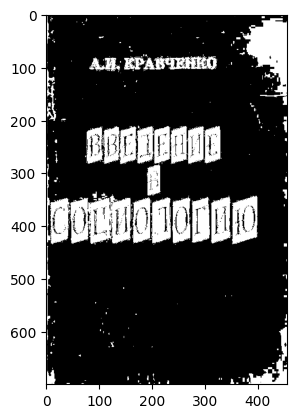

In [33]:
image_copy_text = object_selection(image_without_background, 84, 84, 255, method="avg")
plt.imshow(image_copy_text)

избавимся от шумов

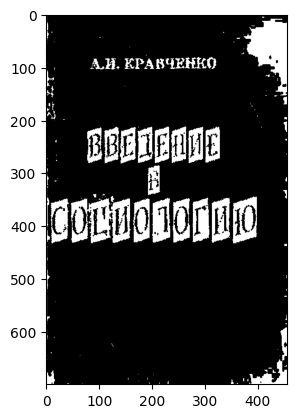

In [34]:
kernel_cross_5 = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
clear_image=cv2.erode(image_copy_text, kernel_cross_3, iterations=1)
plt.imshow(clear_image)

инвертируем цвета

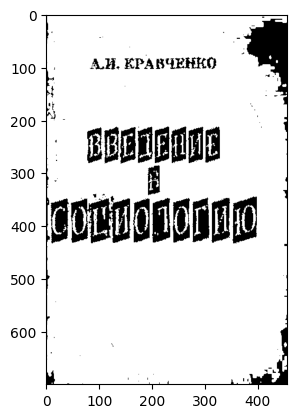

In [35]:
im_ivert = cv2.bitwise_not(clear_image)
plt.imshow(im_ivert)

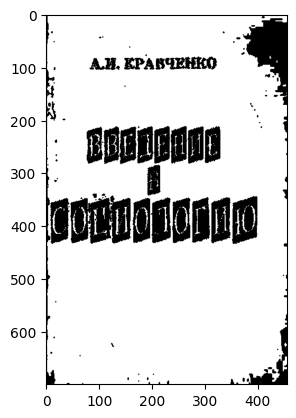

In [36]:
kernel_cross_5 = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
erode_image=cv2.erode(im_ivert, kernel_cross_3, iterations=1)
plt.imshow(erode_image)

распознаем текст

{'level': [1, 2, 3, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 4, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4, 4], 'word_num': [0, 0, 0, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 0, 1, 0, 1], 'left': [0, 0, 0, 0, 0, 82, 148, 334, 354, 0, 0, 77, 399, 0, 0, 0, 0], 'top': [0, 0, 0, 0, 0, 42, 61, 33, 8, 191, 237, 212, 191, 285, 285, 626, 626], 'width': [456, 456, 456, 456, 37, 58, 175, 4, 102, 456, 22, 253, 57, 456, 456, 71, 71], 'height': [700, 700, 700, 227, 227, 64, 44, 4, 168, 96, 50, 72, 76, 345, 345, 74, 74], 'conf': [-1, -1, -1, -1, 49, 20, 52, 90, 48, -1, 63, 62, 26, -1, 42, -1, 1], 'text': ['', '', '', '', '}Е', 'лм,', '&гАвешшю', '|', 'Ч;', '', ':', 'ттшпшшши', '-', '', '›ишшшп@пшт', '', '.']}
['', '', '', '', '}Е', 'лм,', '&гАвешшю', '|', 'Ч;', '', ':', 'ттшпшшши', '-', '', '›ишшшп@пшт'

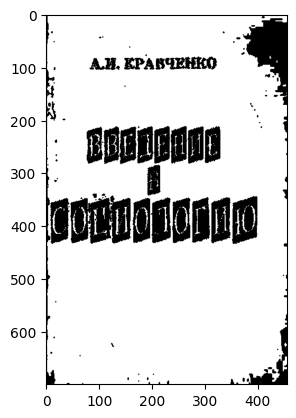

In [37]:
plt.imshow(hl_words_on_image(erode_image, 'введение', "rus"))

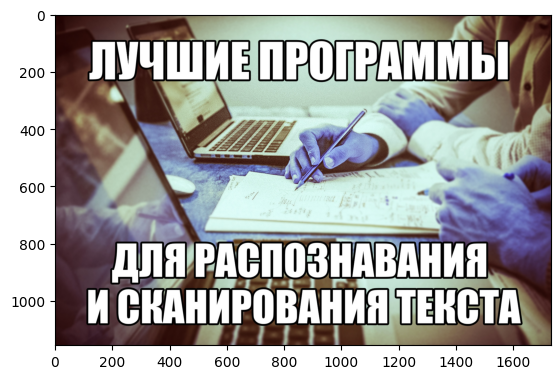

In [38]:
image_copy = cv2.imread("resources/rus_text4.jpg")
plt.imshow(image_copy)

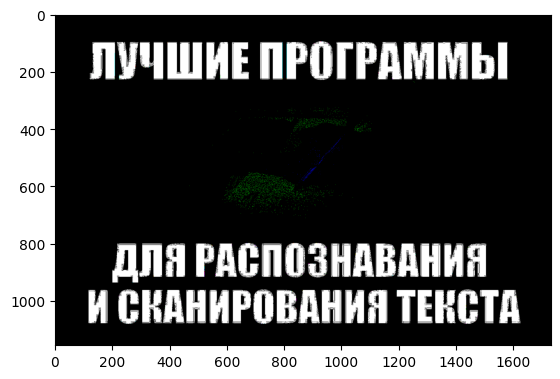

In [39]:
image_copy_text = object_selection(image_copy, 255, 255, 255, False)

plt.imshow(image_copy_text)

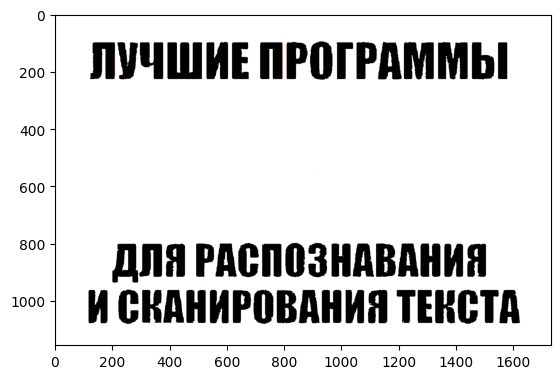

In [40]:
im = cv2.bitwise_not(cv2.medianBlur(image_copy_text, 5))
plt.imshow(im)

{'level': [1, 2, 3, 4, 5, 5, 2, 3, 4, 5, 5, 4, 5, 5, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'par_num': [0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 2], 'word_num': [0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 1, 2, 3], 'left': [0, 122, 122, 122, 122, 715, 117, 117, 200, 200, 492, 117, 117, 221, 1191], 'top': [0, 95, 95, 95, 98, 95, 799, 799, 799, 802, 799, 962, 963, 962, 962], 'width': [1732, 1454, 1454, 1454, 554, 861, 1503, 1503, 1302, 253, 1010, 1503, 66, 937, 429], 'height': [1155, 134, 134, 134, 130, 134, 282, 282, 138, 135, 120, 119, 116, 119, 119], 'conf': [-1, -1, -1, -1, 90, 79, -1, -1, -1, 87, 50, -1, 82, 36, 68], 'text': ['', '', '', '', 'ЛУЧШИЕ', 'ПРОГРАММЫ', '', '', '', 'ДЛЯ', 'РАСПОЗНАБАНИЯ', '', 'И', 'СВАНИРОВАНИЯ', 'ТЕКСТА']}
['', '', '', '', 'ЛУЧШИЕ', 'ПРОГРАММЫ', '', '', '', 'ДЛЯ', 'РАСПОЗНАБАНИЯ', '', 'И', 'СВАНИРОВАНИЯ', 'ТЕКСТА']
['ЛУ

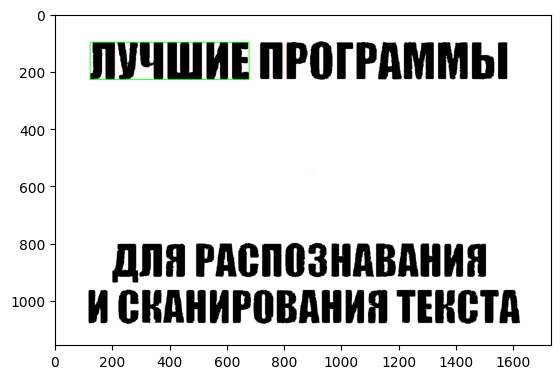

In [41]:
plt.imshow(hl_words_on_image(im, 'лучшие', "rus"))

5. Создайте 2 собственных образца рукописного текста (в графическом
редакторе или фото/скан) на русском и любом другом языке. Попробуйте
выполнить их распознавание с помощью pytesseract.

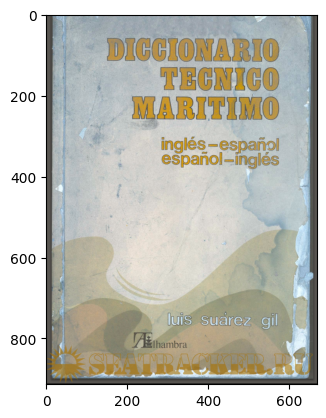

In [42]:
image = cv2.imread("resources/spa_text1.jpg")
plt.imshow(image)

{'level': [1, 2, 3, 4, 5, 5, 4, 5, 5, 4, 5, 2, 3, 4, 5, 5, 5, 4, 5, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 4, 5, 5, 2, 3, 4, 5, 5, 3, 4, 5, 3, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10], 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 0, 0, 1,

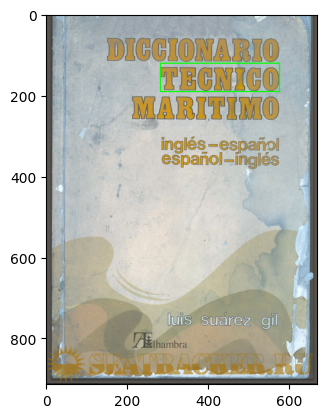

In [43]:
plt.imshow(hl_words_on_image(image, 'TECNICO', "spa"))

6. Распознайте текст из «pdf1.pdf» и «pdf2.pdf» (все страницы). Субъективно
оцените качество распознавания.

In [44]:
import fitz

In [45]:
def reader_pdf(file, page_num=0):
    doc = fitz.open(file)
    if page_num < 1: page_num=doc.page_count
    images = ()
    plt.figure(figsize=(21,12*page_num), dpi=90)
    for page_i in range(page_num):
        page = doc.load_page(page_i) # Загружается 1-я страница pdf-файла (индекс 0)
        pix = page.get_pixmap() 
        image = np.frombuffer(pix.samples, dtype=np.uint8).reshape(pix.h, pix.w, pix.n) # Получаем изображение для дальнейшего распознавания
        images += (image,)
        plt.subplot(page_num, 1, page_i+1)
        plt.imshow(image)
    plt.show()
    return images

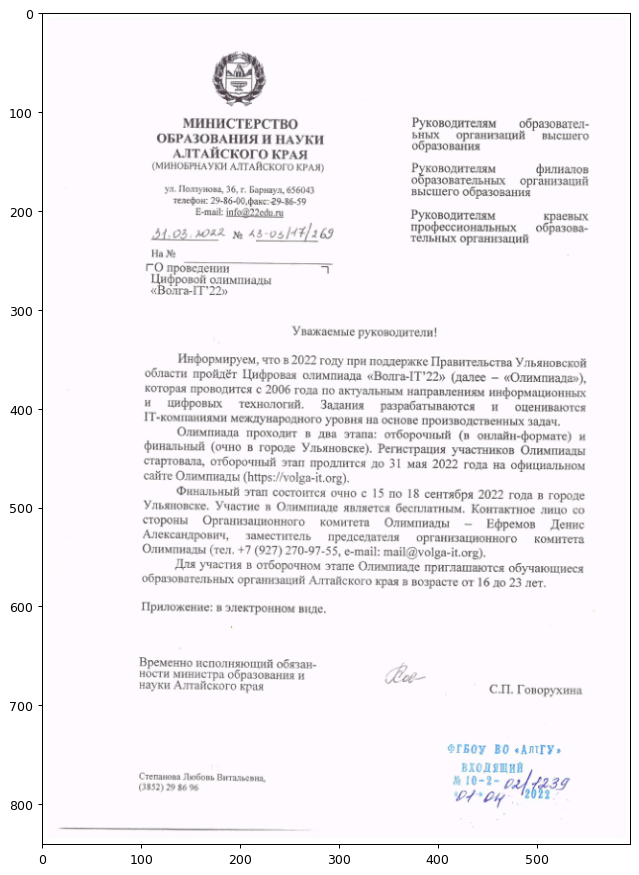

In [49]:
image = reader_pdf(r"resources\pdf1.pdf")[0]

In [50]:
recognized_text = pytesseract.image_to_string(image,lang="rus+eng")
print(recognized_text)

волителям — ображовател-
Er Shure opransaml Pacers

ОБРАЗОВАНИЯ И HAYKH образования:
АЛТАЙСКОГО КРАЯ
(МИНОБРНАУКИ АЛТАЙСКОГО КРАЯ). Рёкаишши филиалов:
образовательных _ организаций,
anyon, 61 Bays, 600 shteutero образований
“exon лоар
"Ema ООФ 2е Руководителям: краевых:
51.05.4082 » 48-05 НН 169 ЦЕНЕ CS
на
гО проведонин
«фровой слиминады
Bonet

Уважаемые руководители!

`Информируем, so в 2022 году при поддержке Правительства Ульяновской
области пройдёт Цифровая олимпиада «ВолгаЧПТ'22» (далее — «Олимпиада»),
которая проводится с 2006 года no актуальным направлениям информационных
и  Шифровых ` технологий. Задания  разрабатываются и — оцениваются
ИП-компаниями международного уровня на основе производственных задач.

Олимпиада проходит в два этапа: отборочный (в онлайн-формате) и
финальный (очно в городе Ульяновске). Регистрация участников Олимпиады!
crapronana, отборочный этап продлится до 31 wax 2022 года на официальном
calfre Олимпиады (htps://volga-it.org).

Финальный этап состоится о

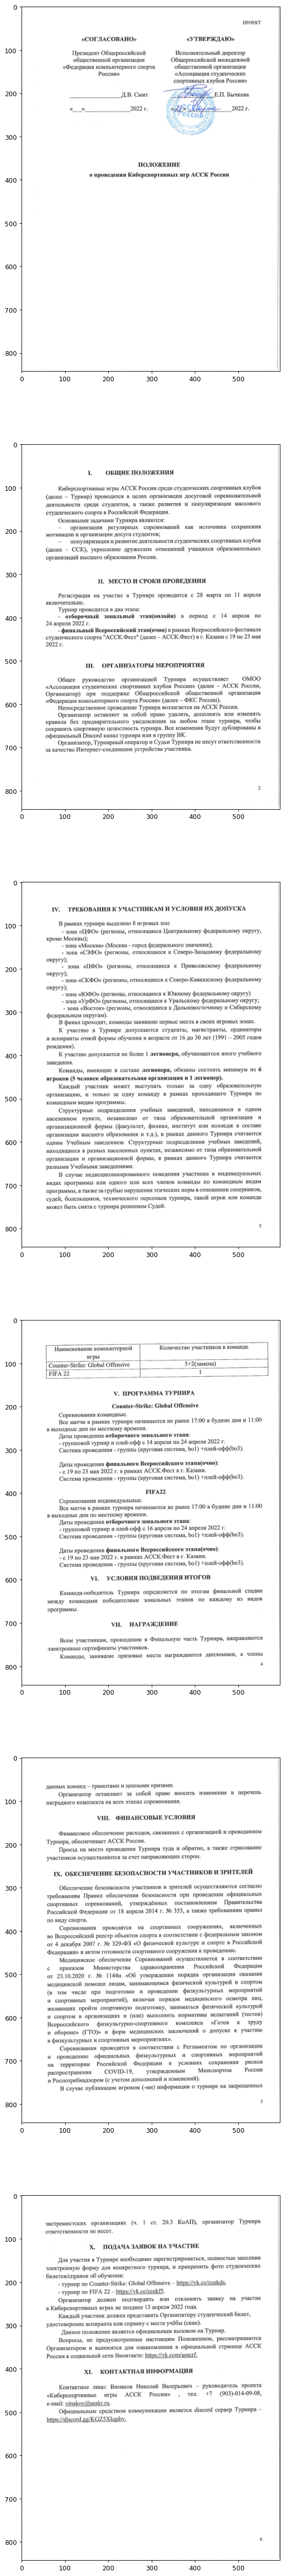

In [51]:
images = reader_pdf(r"resources\pdf2.pdf")

In [52]:
plt.figure(figsize=(28,16), dpi=90)
i=0
for image in images:
    print(f"page: {i+1}")
    print(pytesseract.image_to_string(image, lang="rus+eng"))
    i+=1

page: 1
ПРОЕКТ

«СОГЛАСОВАНО» «УТВЕРЖДАЮ»
Президент Общероссийской `Исполнительный директор

общественной организации Общероссийской молодежной
«Федерация компьютерного copra общественной организации
России» «Ассоциация студенческих

спортивных клубов России»
У

JLB. Cure
2022 r.

ПОЛОЖЕНИЕ
о проведении Киберспортивных игр ACCK России

page: 2
1, — ОБЩИЕ ПОЛОЖЕНИЯ

Киберспортивные игры АССК Россин среди студенческих спортивных клубов
(далес — Турнир) проводятся в целях организации досуговой соревновательной
деятельности среди студентов, а также развития и популяризации массового
студенческого copra в Российской Федерации.

Основными задачами Турнира являются:

— организация регулярных соревнований как источника сохранения
мотивации и организации досуга студентов;

—  популяризация и развитие деятельности студенческих спортивных клубов
(далее — CCK), укрепление дружеских отношений учащихся образовательных.
организаций высшего образования России.

Il, MECTO И СРОКИ ПРОВЕДЕНИЯ

Регистраци

<Figure size 2520x1440 with 0 Axes>